#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  although X Education gets a lot of leads, its lead conversion rate is very poor.To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

#### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


#### Following below process to address this Business Problem
- 1- Data Understanding 
     - Importing Data and Check Statistics
- 2- Data Cleaning
     - Check missing values/checking outliers and fix those by checking their statistics
- 3- Exploratary Analysis
     - Uni-Variate, Bi-Variate and Correlation or pair plots
- 4- Data Preparation
     - Convert in binary column and dummy variables creation 
     - Feature Scaling
- 5- Build Model
     - Split the data in train and test, features scaling, check correlation matrix,
-    - Features Selection using RFE and manual
- 7- Model Evaluation
     - Confustion Matrix
     - Accuracy , specificity, sensitivity, Precision and recall, ROC Curve
8- Prediction of test Data
     - Accuracy , specificity, sensitivity 


### Data Understanding

In [3954]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3955]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline


#### Read the csv file

In [3957]:
# importing dataset in dataframe
df= pd.read_csv("Leads.csv")

In [3958]:
# Check the data and columns        
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [ ]:
# get the values of each columns to identify the binary, categorical and continuous column
for col in df.columns:
    print('-' * 10 + col + '-' * 10 , end='')
    display(df[col].value_counts().head(10))

#### Checking the dataframe

In [ ]:
#checking the dimension of data frame (shape of dataframe)
df.shape

In [ ]:
# checking the statstical information of data
df.describe()

In [ ]:
#checking the data type and null/no-null values (information about dataframe)
df.info()

#### Data Cleaning

#### Checking for Missing Values and Imputing Them

In [ ]:
# checking the missing values
df.isnull().sum()

In [ ]:
# Checking the percentage of missing values
missing_data=round(100*(df.isnull().sum()/len(df.index)), 2)

In [ ]:
#check those are having missing percentage
missing_data[missing_data>0.00]

-Lead Source, TotalVisits, Page Views per visit and Last Activity is having less percentage so remove those rows

In [ ]:
cols= ["Lead Source", "TotalVisits", "Page Views Per Visit", "Last Activity"]

df = df[~df['Lead Source'].isnull()]
df = df[~df['TotalVisits'].isnull()]
df = df[~df['Page Views Per Visit'].isnull()]
df = df[~df['Last Activity'].isnull()]

In [ ]:
#again  Checking the percentage of missing values
missing_data=round(100*(df.isnull().sum()/len(df.index)), 2)
#check those are having missing percentage
missing_data[missing_data>0.00]

#### Columns having more than 40% null values columns,we can remove those columns

In [ ]:
# removing Lead Quality, Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score
# and Asymmetrique Profile Score
df.drop(["Lead Quality", "Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis=1, inplace=True)

In [ ]:
# lets check for remaining columns
#again  Checking the percentage of missing values
missing_data=round(100*(df.isnull().sum()/len(df.index)), 2)
#check those are having missing percentage
missing_data[missing_data>0.00]

#### Lets plot this Country column

In [ ]:
#check statstics of Country Column
df.Country.describe()

In [3959]:
#check different values     
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
# plot the Country Column
sns.countplot(df.Country)
xticks(rotation = 90)
plt.show()

In [ ]:
# As most data is from India so we can impute the data as India in missing values
df["Country"]= df.Country.fillna("India")
df.Country.isnull().sum()

In [ ]:
# As Mostly data from India Country only so this will give any inference as we can remove this column
dropcols= ["Country"]

#### Lets do with specialization


In [ ]:
#Statistical of Specialization Column
df.Specialization.describe()

In [ ]:
# check values of Specilization
df.Specialization.value_counts()

In [ ]:
# mostly are select so first replace select with na
df.Specialization= df.Specialization.apply(lambda x: np.nan if x=="Select" else x )

In [ ]:
#plot the Specilization Column
sns.countplot(df.Specialization)
xticks(rotation = 90)
plt.show()

In [ ]:
# Lets name it extra to nan columns in specialization
df.Specialization=df.Specialization.fillna("Extra")
df.Specialization.isnull().sum()

#### How did you hear about X Education

In [ ]:
#check Statstical description
df['How did you hear about X Education'].describe()

In [ ]:
#check values
df['How did you hear about X Education'].value_counts()

In [ ]:
# repalce select with nan first
df['How did you hear about X Education'] = df['How did you hear about X Education'].apply(lambda x : "Other" if x=="Select" else x)
df['How did you hear about X Education'].describe()

In [ ]:
# lets plot it
sns.countplot(df['How did you hear about X Education'])
xticks(rotation=90)
plt.show()

In [ ]:
# Lets impute with "Online Search"
df['How did you hear about X Education']= df['How did you hear about X Education'].fillna("Online Search")
df['How did you hear about X Education'].isnull().sum()

#### lets do with What is your current occupation

In [ ]:
#check Statistical description
df['What is your current occupation'].describe()

In [ ]:
#values of that column
df['What is your current occupation'].value_counts()

In [ ]:
#plot it
sns.countplot(df['What is your current occupation'])
xticks(rotation=90)
plt.show()

In [ ]:
# lets impute with Unemployed
df['What is your current occupation'] = df['What is your current occupation'].fillna("Unemployed")
df['What is your current occupation'].isnull().sum()

#### Lets do with What matters most to you in choosing a course

In [ ]:
#check statistical description
df['What matters most to you in choosing a course'].describe()

In [ ]:
#check values
df['What matters most to you in choosing a course'].value_counts()

In [ ]:
#plot it
sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation=90)
plt.show()

In [ ]:
# lets impute with "Better Carrer Prospects"
df['What matters most to you in choosing a course']= df['What matters most to you in choosing a course'].fillna('Better Career Prospects')
df['What matters most to you in choosing a course'].isnull().sum()

In [ ]:
# 99% data from Better Career Prospective so we can remove this column also
dropcols.append('What matters most to you in choosing a course')

#### Lets do with Tags

In [ ]:
#check statistical description
df.Tags.describe()

In [ ]:
# lets plot this
sns.countplot(df.Tags)
xticks(rotation=90)
plt.show()

In [ ]:
#check values count
df.Tags.value_counts()

In [ ]:
# Replace those are having low frequency or not used to others tag category
df.Tags= df.Tags.replace(["Already a student", "switched off", "Lost to EINS", "Not doing further education",
"Interested  in full time MBA","Graduation in progress","invalid number","Diploma holder (Not Eligible)",
"wrong number given", "opp hangup","number not provided","in touch with EINS","Lost to Others",
"Still Thinking", "Want to take admission but has financial problems", "In confusion whether part time or DLP",
"Interested in Next batch","Lateral student", "Shall take in the next coming month","University not recognized",
"Recognition issue (DEC approval)"], "Others")

In [ ]:
# Lets impute this with Will revert after reading the email
df.Tags= df.Tags.fillna("Will revert after reading the email")
df.Tags.isnull().sum()

#### Lets do with Lead Profile

In [ ]:
#check statistical description
df['Lead Profile'].describe()

In [ ]:
#Replace select with null
df['Lead Profile']= df['Lead Profile'].apply(lambda x : np.nan if x=="Select" else x)
df['Lead Profile'].describe()

In [ ]:
# lets plot this
sns.countplot(df['Lead Profile'])
xticks(rotation=90)
plt.show()

In [ ]:
#Lets impute with Potential Lead with mod
df['Lead Profile']= df['Lead Profile'].fillna("Potential Lead")
df['Lead Profile'].isnull().sum()

#### Lets do with City

In [ ]:
#check statistical description
df.City.describe()

In [ ]:
#replace select with null
df['City']= df['City'].apply(lambda x : np.nan if x=="Select" else x)
df['City'].describe()

In [ ]:
#lets plot it
sns.countplot(df.City)
xticks(rotation=90)
plt.show()

In [ ]:
# Lets impute with Mumbai
df.City= df.City.fillna("Mumbai")
df.City.isnull().sum()

#### Check any missing values are there

In [ ]:
# lets check for remaining columns
#again  Checking the percentage of missing values
missing_data=round(100*(df.isnull().sum()/len(df.index)), 2)
#check those are having missing percentage
missing_data[missing_data>0.00]

#### Check Oultliers

In [ ]:
#divide in Categorical and Continuous columns
categorical_cols=["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","Specialization",
                  "How did you hear about X Education","What is your current occupation",
                  "What matters most to you in choosing a course",
                  "Search","Magazine","Newspaper Article","X Education Forums","Newspaper",
                  "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Tags"
                  ,"Update me on Supply Chain Content","Get updates on DM Content","Lead Profile","City",
                  "Last Notable Activity", "I agree to pay the amount through cheque",
                  "A free copy of Mastering The Interview"]
continuous_cols=["Lead Number","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
target_col=["Converted"]

In [ ]:
# boxplot to check outliers
cols = 2
rows = 2
num_cols = continuous_cols 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

- As per boxplot, TotalVisits and PageViewPerVisit having outliers
- lets check percentile of this

In [ ]:
# totalVisits and cap it
q25,q75, q90, q95,q99, q100 =np.percentile(df['TotalVisits'],[25,75,90, 95,99,100])
inter_qtr= q75-q25
max = q75+(1.5*inter_qtr)
min = q25-(1.5*inter_qtr)
# cap the min and max values
df['TotalVisits'][df['TotalVisits']<min]=min
df['TotalVisits'][df['TotalVisits']>max]=max

In [ ]:
# Page Views Per Visit and cap it
q25,q75, q90, q95,q99, q100 =np.percentile(df['Page Views Per Visit'],[25,75,90, 95,99,100])
inter_qtr= q75-q25
max = q75+(1.5*inter_qtr)
min = q25-(1.5*inter_qtr)
# cap the min and max values
df['Page Views Per Visit'][df['Page Views Per Visit']<min]=min
df['Page Views Per Visit'][df['Page Views Per Visit']>max]=max

In [ ]:
# plot again to check outliers
cols = 2
rows = 2
num_cols = continuous_cols  
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

#### Exploratary Data Analysis

##### Uni-Variate Data Analysis

In [ ]:
#plot it
cols = 2
rows = 2
colss = ["Lead Origin","Lead Source","Do Not Email","Do Not Call"] 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(colss):   
    ax=fig.add_subplot( rows, cols, i+1)    
    sns.countplot(x=df[col], ax=ax)
    xticks(rotation=90)
    
fig.tight_layout()  
plt.show()

In [ ]:
# Lead Source
df['Lead Source'].value_counts()

In [ ]:
# Combining low frequency values in other category in lead source
df['Lead Source']= df['Lead Source'].replace(["Facebook","bing", "Click2call", "Press_Release", "Social Media", 
"Live Chat","youtubechannel", "testone", "Pay per Click Ads", "welearnblog_Home", "WeLearn", "blog", "NC_EDM"], "Others")
df['Lead Source']= df['Lead Source'].replace("google", "Google")


In [ ]:
#plot categorical data
cols = 2
rows = 2
colss = ["Last Activity","Country","Specialization", "How did you hear about X Education"] 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(colss):   
    ax=fig.add_subplot( rows, cols, i+1)    
    sns.countplot(x=df[col], ax=ax)
    xticks(rotation=90)
    
fig.tight_layout()  
plt.show()

In [ ]:
#plot categorical data
cols = 2
rows = 2
colss = ["What is your current occupation","What matters most to you in choosing a course","Search","Magazine"] 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(colss):   
    ax=fig.add_subplot( rows, cols, i+1)    
    sns.countplot(x=df[col], ax=ax)
    xticks(rotation=90)
    
fig.tight_layout()  
plt.show()

In [ ]:
#plot categorical data
cols = 2
rows = 2
colss = ["Newspaper Article","X Education Forums","Newspaper", "Digital Advertisement"] 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(colss):   
    ax=fig.add_subplot( rows, cols, i+1)    
    sns.countplot(x=df[col], ax=ax)
    xticks(rotation=90)
    
fig.tight_layout()  
plt.show()

In [ ]:
#plot categorical data
cols = 2
rows = 2
colss = ["Through Recommendations","Receive More Updates About Our Courses","Tags","Update me on Supply Chain Content"] 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(colss):   
    ax=fig.add_subplot( rows, cols, i+1)    
    sns.countplot(x=df[col], ax=ax)
    xticks(rotation=90)
    
fig.tight_layout()  
plt.show()

In [ ]:
#plot categorical data
cols = 2
rows = 3
colss = ["Get updates on DM Content","Lead Profile","City", "Last Notable Activity","I agree to pay the amount through cheque",
                  "A free copy of Mastering The Interview"] 
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(colss):   
    ax=fig.add_subplot( rows, cols, i+1)    
    sns.countplot(x=df[col], ax=ax)
    xticks(rotation=90)
    
fig.tight_layout()  
plt.show()

- From Univariate Analysis, it is shown that some columns having only one output, so we can remove that
- More Leads are coming from Landing Page submission,Lead Origin .
- Most Lead Source are from google.
- Do not email and do not not call having one output, so we can remove these as there is no inference from it
- Last Activity from Email opened is traced most , as can say that more leads are coming email
- Mostly lead are approaching from India
- Leads are not choosings specialization, either they dont have in list or they dont want to opt
- Most leads are searching online for this X Eductaion
- Mostly Unemployed are opting for eductaion
- Reason for choosing a course is more for better career prospectus
- Ads listed in Search, NEwspaper, Magzine, Newspaper Article, Digital Advertisement,Eductaion forums, Through recommendation cant give any inference so can remove these columns
- Tags will revert after reading the email having most lead
- Receive more Updates About our course, get updates on DM content, I agree to pay the amount through cheque,a free copy of Mastering The Interview and Update me on supply chain content giving no inference
- Potential LEads are from Lead Profile
- Mumbai City having most leads
- Mostly are done last activity as modified


In [ ]:
# Drop Columns which did not get any inference from uni variate analysis
df=df.drop(dropcols, axis=1)

- Bi Variate Analysis

In [ ]:
# Bivariate analysis on continuous column
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.boxplot(y='Lead Number', x='Converted', data=df)
plt.subplot(2,2,2)
sns.boxplot(y='TotalVisits', x='Converted', data=df)
plt.subplot(2,2,3)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=df)
plt.subplot(2,2,4)
sns.boxplot(y='Page Views Per Visit',x='Converted', data=df)
plt.show()

In [ ]:
categorical_cols=["Lead Origin","Lead Source","Last Activity","Country","Specialization",
                  "How did you hear about X Education","What is your current occupation",
                  "What matters most to you in choosing a course",
                  "Tags","Lead Profile","City","Last Notable Activity"]

In [ ]:
rows=2
cols=2
columns=["Lead Origin","Lead Source","Last Activity"]
fig= plt.figure(figsize=(15,9))
for i, coll in enumerate(columns):
    ax= fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=coll, hue="Converted", data=df)
    xticks(rotation=90)
fig.tight_layout()
plt.show()



In [ ]:
rows=2
cols=2
columns=["Specialization","How did you hear about X Education","What is your current occupation"]
fig= plt.figure(figsize=(15,9))
for i, coll in enumerate(columns):
    ax= fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=coll, hue="Converted", data=df)
    xticks(rotation=90)
fig.tight_layout()
plt.show()

In [ ]:

rows=2
cols=2
columns=["Tags","Lead Profile","City","Last Notable Activity"]
fig= plt.figure(figsize=(15,9))
for i, coll in enumerate(columns):
    ax= fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=coll, hue="Converted", data=df)
    xticks(rotation=90)
fig.tight_layout()
plt.show()

- More converted Leads are coming from Landing Page submission,Lead Origin 
- Most converted Lead Source are from Google
- Most Converted Leads are coming from Last Activity from SMS sent
- Converted Leads are not choosings specialization, either they dont have in list or they dont want to opt
- Most Converted leads are searching online for this X Eductaion
- Most Converted Unemployed are opting for eductaion
- Tags will revert after reading the email having most converted lead
- Potential Leads are from Lead Profile
- Mumbai City having most converted leads
- Converted Leads mostly are done last activity as SMS Sent
- 50 percentile for Lead Number for Converted and non- Converted are almost same, so cant 
get any inferences, we can remove this column
- 50 percentile for TotatVisits for Converted and non- Converted are 
almost same, so cant get any inferences, although converted leads having more counts
- 50 percentile for Page View per Visit for Converted and non- Converted are 
almost same, so cant get any inferences, although converted leads having more counts
- Total Time spent on Website having more converted leads

In [ ]:
df.drop("Lead Number", inplace=True, axis=1)

In [ ]:
df.drop("Prospect ID", inplace=True, axis=1)

#### Multivariate Analysis

In [ ]:
continuous_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
sns.pairplot(df[continuous_cols])
plt.show()

- Not finding any relation by this

<AxesSubplot:>

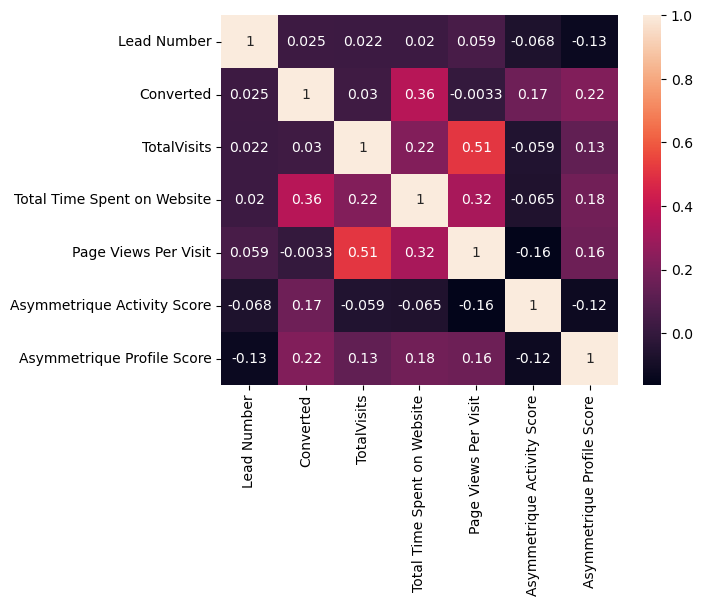

In [3960]:
#check heatmap
sns.heatmap(df.corr(), annot=True)

Data Preparation
- Convert into binary columns (yes/No to 0/1)

In [ ]:
binary_cols=["Do Not Email","Do Not Call","Get updates on DM Content","I agree to pay the amount through cheque",
"A free copy of Mastering The Interview","Search","Magazine","Newspaper Article","X Education Forums",
"Newspaper","Update me on Supply Chain Content","Digital Advertisement","Through Recommendations",
"Receive More Updates About Our Courses","Get updates on DM Content"]
df[binary_cols]= df[binary_cols].apply(lambda x: 1 if str(x).lower()=="yes" else 0)

#### Creating dummy variables form categorical columns

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy= pd.get_dummies(df['Lead Origin'], drop_first=True, prefix="Origin_")
dummy_Source= pd.get_dummies(df['Lead Source'], drop_first=True, prefix="Source_")
dummy_Activity= pd.get_dummies(df['Last Activity'], drop_first=True, prefix="Activity_")
dummy_Specialization= pd.get_dummies(df['Specialization'], drop_first=True, prefix="Specialization_")

dummy_Education= pd.get_dummies(df['How did you hear about X Education'], drop_first=True, prefix="Education_")

dummy_occupation= pd.get_dummies(df['What is your current occupation'], drop_first=True, prefix="occupation_")
dummy_Tags= pd.get_dummies(df['Tags'], drop_first=True, prefix="Tags_")
dummy_Profile= pd.get_dummies(df['Lead Profile'], drop_first=True, prefix="Profile_")

dummy_City= pd.get_dummies(df['City'], drop_first=True, prefix="City_")
dummy_lastActivity= pd.get_dummies(df['Last Notable Activity'], drop_first=True, prefix="notableActivity_")



In [ ]:
# contact to main data frame and drop original columns
df=pd.concat([df,dummy, dummy_Source, dummy_Activity, dummy_Specialization, dummy_Education, dummy_occupation,
           dummy_Tags, dummy_Profile, dummy_City, dummy_lastActivity], axis=1 )
df.drop( ['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education',
         'What is your current occupation','Tags', 'Lead Profile','City'
         ,'Last Notable Activity'], inplace=True, axis=1)
df.head()

### Build Model
- Test and train split

In [ ]:
# X- independent variable X= df.drop("Converted", axis=1)
X.head()

In [ ]:
# y-Dependent Variable
y= df["Converted"]
y.head()

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, train_size=.7, test_size=.3)

#### Feature Scaling

In [ ]:
# scale the continuous columns
from sklearn.preprocessing import StandardScaler
standard= StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= standard.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()


In [ ]:
#check the conversion rate
Converted_rate=round(sum(df['Converted'])/ len(df['Converted'].index)*100,2)
Converted_rate

- Converted rate is 38%

#### Run First Model

In [ ]:
import statsmodels.api  as sm

In [ ]:
# Run logistic regression model
X_train_sm= sm.add_constant(X_train)
log1= sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
log1.fit().summary()

#### Feature Selection using RFE

In [ ]:
#select features using RFE and Manual
from sklearn.linear_model  import LogisticRegression
loglog= LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe= RFE(loglog, n_features_to_select=15, step=1)
rfe=rfe.fit(X_train, y_train)

In [ ]:
#check RFE support
rfe.support_

In [ ]:
#Zip column, support and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
#select those columns which are having support true
cols= X_train.columns[rfe.support_]

In [ ]:
cols

In [ ]:
#check those having support false
X_train.columns[~rfe.support_]

#### Assessing the statsmodel

In [ ]:
#again run logistic regression using selected columns
X_train_sm=sm.add_constant(X_train[cols])
log1= sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res=log1.fit()
res.summary()

check VIFs

In [ ]:
# Check for the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Getting the predicted values on the train set
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
#reshape it
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [ ]:
#create rataframe and find probability
y_train_pred_final= pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final["Lead_Id"]= y_train.index
y_train_pred_final.head()

In [ ]:
#predict the value
y_train_pred_final['Predicted']= y_train_pred_final.Converted_prob.apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Print confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

In [ ]:
# Predicted     not_converted    convert
# Actual
# not_convert        3733         172
# convert            589          1857  

In [ ]:
#check accuracy on train data
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy Score is 88%

### Metrics beyond simply accuracy

In [ ]:
TP= confusion[1,1] # True Positive
TN= confusion[0,0] #true Negatives
FP= confusion[0,1] #False Positive
FN= confusion[1,0] #False Negative

In [ ]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

Sensitivity is 84%

In [ ]:
# Let us calculate specificity
print(TN / float(TN+FP))

Specificity is 91%

In [ ]:
# Calculate false postive rate - predicting converted when customer does not have converted to lead
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
#plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
# final predicted using optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

### Calculate Lead Score

In [ ]:
#calculate lead Score
y_train_pred_final['LeadScore'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### Precision and Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Precision
print(TP / (TP + FP))

In [ ]:
# Recall
print(TP /( TP + FN))

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
#check precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [ ]:
#check recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

#### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [ ]:
# Feature Scaling on test data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= standard.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test= X_test[cols]
X_test.head()

In [ ]:
y_test.head()

In [ ]:
# add constant
X_test_sm= sm.add_constant(X_test)

In [ ]:
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
y_pred_final.head()

In [ ]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
#prediction on test data
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
#check variables that are most potential to convert lead
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()